# Маляренко Андрей Игоревич

Ссылка на данные: https://www.kaggle.com/uciml/german-credit

In [2]:
from google.colab import files
uploaded = files.upload()

Saving german_credit_data.csv to german_credit_data.csv


In [152]:
# 1. Считайте DataFrame

# ваш код тут
import pandas as pd
df = pd.read_csv('german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


Написать фукнцию, которая принимает DataFrame
и возвращает количество строк для каждого типа 'Sex',
а также среднее значения Age для каждого типа 'Sex'
ваш код тут

In [146]:
def func(data): 
  sr1 = data[data['Sex']=='male']['Age'].mean()
  sr2 = data[data['Sex']=='female']['Age'].mean()
  return (data['Sex'].value_counts(), sr1,sr2)
array = func(df)
print("количество строк для каждого типа 'Sex':",array[0],"\n\n\nсреднее значения Age для male:", array[1],"\nсреднее значения Age для female:",array[2])

количество строк для каждого типа 'Sex': male      690
female    310
Name: Sex, dtype: int64 


среднее значения Age для male: 36.778260869565216 
среднее значения Age для female: 32.803225806451614


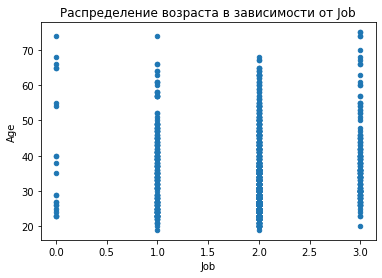

In [147]:
# 3. Построить график:
# - распределение возраста в зависимости от Job
# У графика должен быть заголовок, подписаны оси, а также легенда (т е графики должны быть подписаны)
# график должен быть читабельным (если масштаб маленький, увеличьте размер холста)
# Пример вывода приведен

# ваш код тут
import matplotlib.pyplot as plt
df.plot(x = 'Job',y = 'Age', kind='scatter')
plt.title('Распределение возраста в зависимости от Job')
plt.xlabel("Job")        
plt.ylabel("Age") 
plt.show()

In [175]:
# 4. Проведите анализ DataFrame
# - Какая размерность данных?
# - Какие типы переменных представленны в наборе данных?
# - Есть пропуски в данных? Если да, удалите строки, в которых есть пропуски

# ваш код тут
data = df

print('размерность данных', data.shape)
arr = [type(data['Age'][0]), type(data['Job'][0]), type(data['Housing'][0]), type(data['Saving accounts'][1]), type(data['Checking account'][0]), type(data['Credit amount'][0]), type(data['Duration'][0]),type(data['Purpose'][0])]
print("Типы переменных столбцов:", data.dtypes)
print('\n\nтипы различных переменных представленны в наборе данных:', set(arr))
print("\n\nКоличество пропусков в данных по столбцам:\n",data.isna().sum())
print("\n\nОбщее количество пропусков в данных:",sum(list(data.isna().sum())))
data = data.dropna()
data

размерность данных (1000, 11)
Типы переменных столбцов: Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
sex_number           int64
dtype: object


типы различных переменных представленны в наборе данных: {<class 'numpy.int64'>, <class 'str'>}


Количество пропусков в данных по столбцам:
 Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
sex_number            0
dtype: int64


Общее количество пропусков в данных: 577


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,sex_number
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,0
7,7,35,male,3,rent,little,moderate,6948,36,car,0
9,9,28,male,3,own,little,moderate,5234,30,car,0
...,...,...,...,...,...,...,...,...,...,...,...
989,989,48,male,1,own,little,moderate,1743,24,radio/TV,0
993,993,30,male,3,own,little,little,3959,36,furniture/equipment,0
996,996,40,male,3,own,little,little,3857,30,car,0
998,998,23,male,2,free,little,little,1845,45,radio/TV,0


In [176]:
# 5. Удалите все строки, в которых значение Purpose == radio/TV

# ваш код тут
import numpy as np
data2 = df
data2 = data2.drop(np.where(data2['Purpose'] == 'radio/TV')[0])
data2

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,sex_number
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,0
5,5,35,male,1,free,NaN,NaN,9055,36,education,0
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,0
...,...,...,...,...,...,...,...,...,...,...,...
993,993,30,male,3,own,little,little,3959,36,furniture/equipment,0
994,994,50,male,2,own,NaN,NaN,2390,12,car,0
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,996,40,male,3,own,little,little,3857,30,car,0


In [177]:
# 6. Создайте новый столбец в DataFrame, в котором будут типы Sex будут заменены на числовые значения
# например, все значения male станут равны 0

# ваш код тут

data3 = df
data3['sex_number'] = -1
data3['sex_number'][data3['Sex'] == 'female'] = 1
data3['sex_number'][data3['Sex'] == 'male'] = 0
data3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,sex_number
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,996,40,male,3,own,little,little,3857,30,car,0
997,997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,998,23,male,2,free,little,little,1845,45,radio/TV,0
